In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import sklearn.preprocessing
from sklearn.metrics import r2_score
from pandas import read_csv
from datetime import datetime
from keras.layers import Dense,Dropout,SimpleRNN,LSTM
from keras.models import Sequential

In [13]:
df = pd.read_csv('api_data/daily_building_consumption_0624.csv')
df.head()

,Day,Total_consumption
0,2024-07-01,300.7035
1,2024-07-02,331.1071
2,2024-07-03,247.1963
3,2024-07-04,318.9897
4,2024-07-05,221.3844


In [14]:
# 1. Convert Day to DateTime type
df['Day'] = pd.to_datetime(df['Day'])

# 2. Set Day as the DataFrame index
df = df.set_index('Day')

df.isna().sum()


Total_consumption    0
dtype: int64

In [10]:
#dropping rows with missing data
df = df.dropna()
#checking missing data
df.isna().sum()

Total_consumption    0
dtype: int64

<Axes: xlabel='Day'>

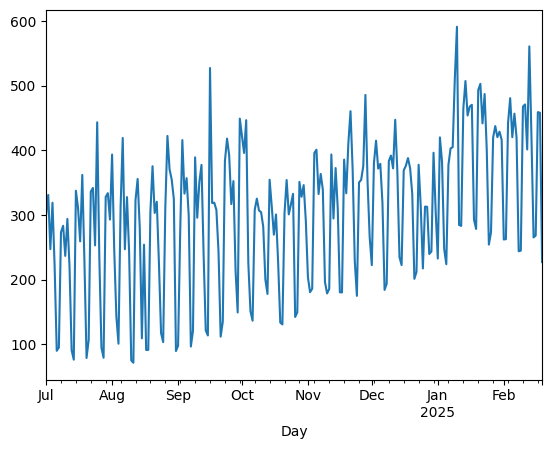

In [15]:
consumption = df['Total_consumption']
consumption.plot()

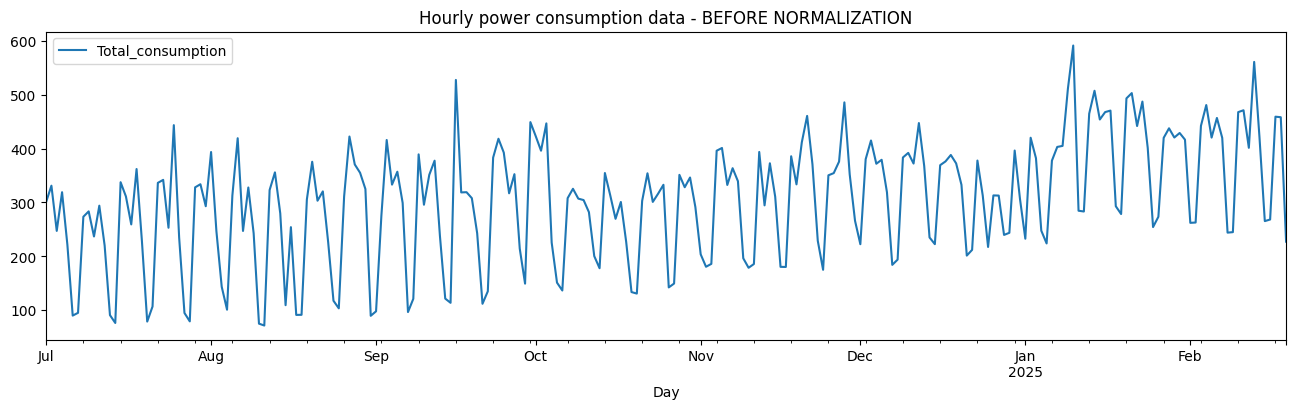

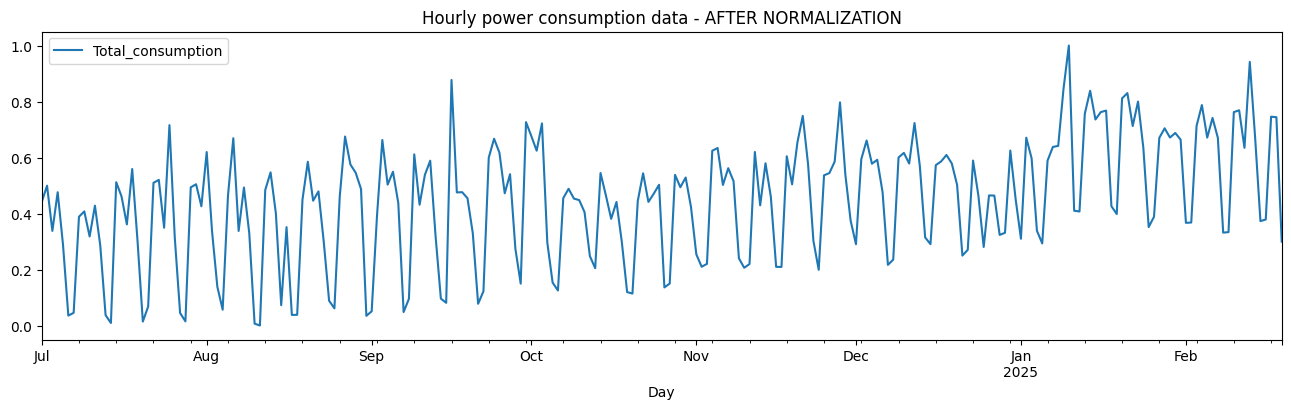

X_train.shape = (171, 20, 1)
y_train.shape = (171,)
X_test.shape  = (43, 20, 1)
y_test.shape  = (43,)


c:\Users\user\enviroments\Stage_project\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_3 (SimpleRNN)        │ (None, 20, 40)         │         1,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 20, 40)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_4 (SimpleRNN)        │ (None, 20, 40)         │         3,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 20, 40)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_5 (SimpleRNN)        │ (None, 40)             │         3,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 40)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            41 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,201 (32.04 KB)

 Trainable params: 8,201 (32.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 1.0648
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.5909
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.5306
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.5194
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.3575
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.2576
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.3037
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.3173
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.3343
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.2766
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.2536
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.2415
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.2200
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.2275
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.2478
Epoch 16/50
1/1 ━━━━━━━━━━━━━━━━━━━━

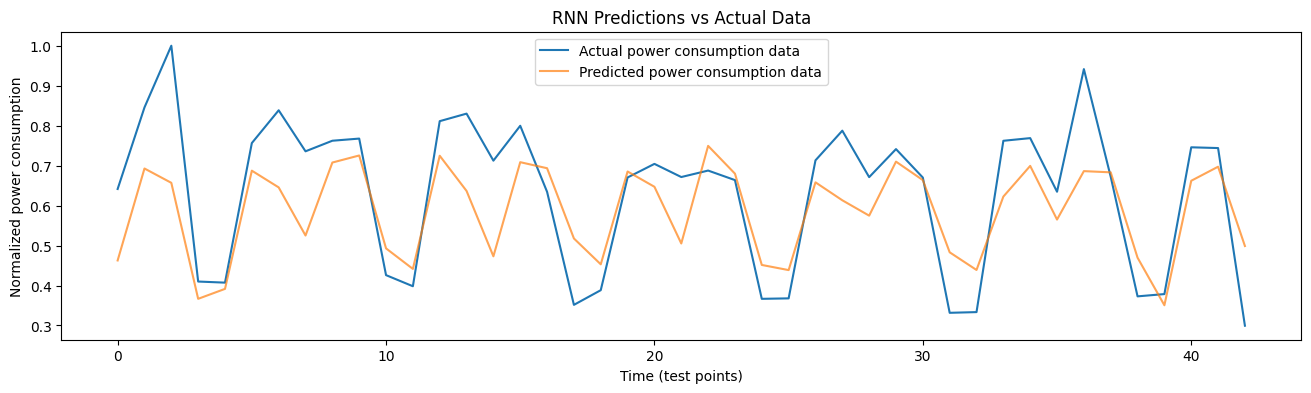

c:\Users\user\enviroments\Stage_project\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 20, 40)         │         6,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 20, 40)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 20, 40)         │        12,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 20, 40)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 40)             │        12,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 40)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            41 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,681 (127.66 KB)

 Trainable params: 32,681 (127.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.2039
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.1763
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.1498
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.1261
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.0985
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.0800
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.0609
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.0435
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0426
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0531
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.0649
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 0.0556
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0545
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0471
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 0.0414
Epoch 16/50
1/1 ━━━━━━━━━━━━━━━━━━━━

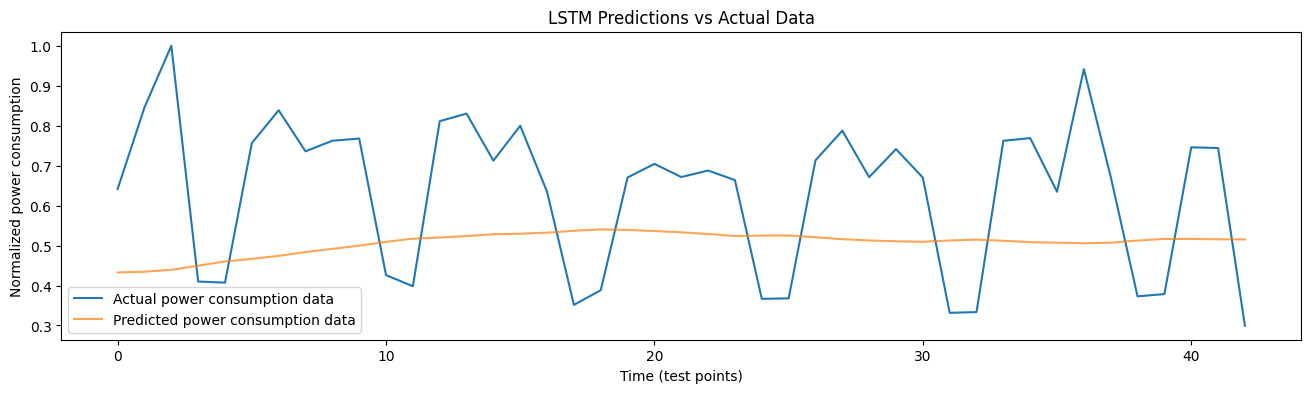

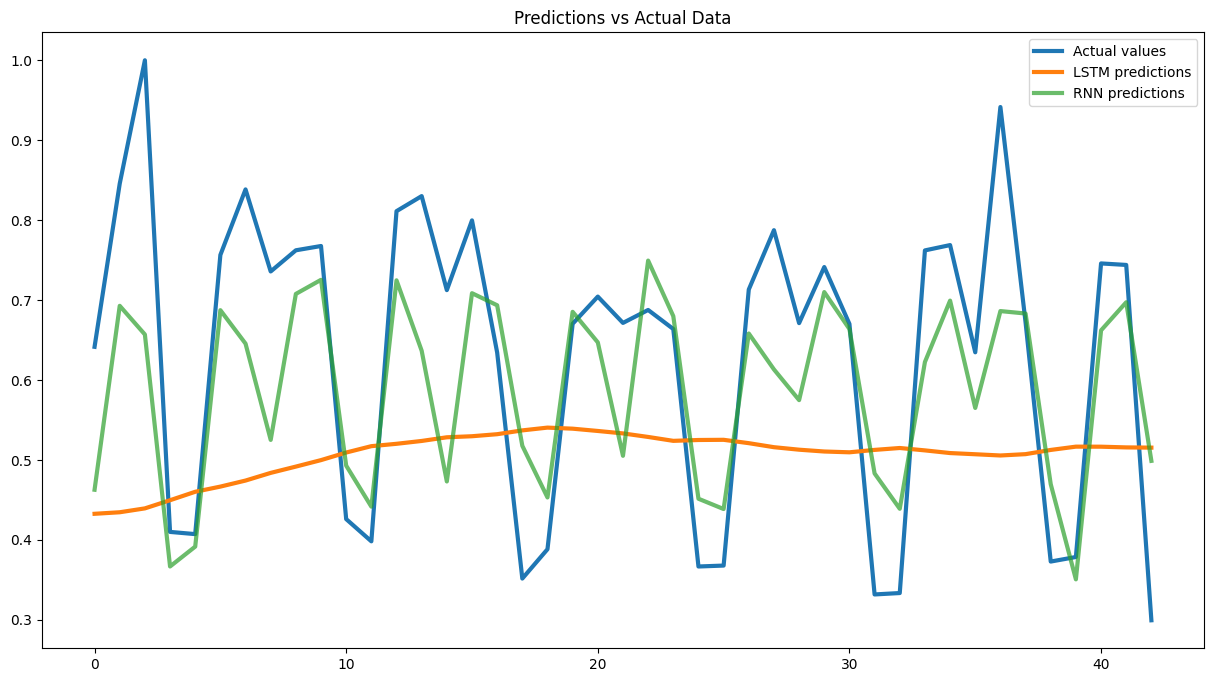

In [16]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt
# Filter your data to only include the desired date range
start_date = "2022-09-11"
end_date   = "2025-02-19"
df = df.loc[start_date : end_date]

# 3. Visualize data before normalization
# --------------------------------------
df["Total_consumption"].plot(figsize=(16,4), legend=True)
plt.title('Hourly power consumption data - BEFORE NORMALIZATION')
plt.show()

# 4. Normalize data
# -----------------
def normalize_data(df):
    scaler = MinMaxScaler()
    # Fit the scaler only on the "Total_consumption" column
    df["Total_consumption"] = scaler.fit_transform(df["Total_consumption"].values.reshape(-1,1))
    return df, scaler

df_norm, scaler = normalize_data(df.copy())
df_norm["Total_consumption"].plot(figsize=(16,4), legend=True)
plt.title("Hourly power consumption data - AFTER NORMALIZATION")
plt.show()

# 5. Prepare data for training the RNN models
# -------------------------------------------
def create_sequences(data_arr, seq_len):
    """
    data_arr: a 1D numpy array (already normalized)
    seq_len : number of time steps per sample
    """
    X, y = [], []
    for i in range(seq_len, len(data_arr)):
        # Take the previous seq_len values as input
        X.append(data_arr[i - seq_len : i])
        # Take the current value as the label
        y.append(data_arr[i])
    X = np.array(X)
    y = np.array(y)
    return X, y

# Create sequences from your normalized column
seq_len = 20
consumption_arr = df_norm["Total_consumption"].values
X, y = create_sequences(consumption_arr, seq_len)

# 6. Split into train/test sets
# -----------------------------
# Example approach: 
# - Use 80% of the data for training (rounded down)
# - 20% for testing
train_size = int(len(X) * 0.8)

X_train = X[:train_size]
y_train = y[:train_size]
X_test  = X[train_size:]
y_test  = y[train_size:]

# Reshape into 3D [samples, timesteps, features=1] for RNN/LSTM
X_train = X_train.reshape(X_train.shape[0], seq_len, 1)
X_test  = X_test.reshape(X_test.shape[0], seq_len, 1)

print("X_train.shape =", X_train.shape)
print("y_train.shape =", y_train.shape)
print("X_test.shape  =", X_test.shape)
print("y_test.shape  =", y_test.shape)

# 7. Build a simple RNN model
# ---------------------------
rnn_model = Sequential()
rnn_model.add(SimpleRNN(40, activation="tanh", return_sequences=True, 
                        input_shape=(X_train.shape[1], 1)))
rnn_model.add(Dropout(0.15))
rnn_model.add(SimpleRNN(40, activation="tanh", return_sequences=True))
rnn_model.add(Dropout(0.15))
rnn_model.add(SimpleRNN(40, activation="tanh", return_sequences=False))
rnn_model.add(Dropout(0.15))
rnn_model.add(Dense(1))

rnn_model.summary()

# 8. Evaluate RNN performance
# ---------------------------
rnn_model.compile(optimizer="adam", loss="MSE")
rnn_model.fit(X_train, y_train, epochs=50, batch_size=256)

rnn_predictions = rnn_model.predict(X_test)
rnn_score = r2_score(y_test, rnn_predictions)
print("R2 Score of RNN model: ", rnn_score)

# Forecast errors and bias
forecast_errors = y_test.reshape(-1) - rnn_predictions.reshape(-1)
bias = np.mean(forecast_errors)
print('Bias: %f' % bias)

# Mean Absolute Error
mae = mean_absolute_error(y_test, rnn_predictions)
print('MAE: %f' % mae)

# Root Mean Squared Error
mse = mean_squared_error(y_test, rnn_predictions)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

# 9. Plot RNN predictions vs actual
# ---------------------------------
def plot_predictions(test, predicted, title):
    plt.figure(figsize=(16,4))
    plt.plot(test, label='Actual power consumption data')
    plt.plot(predicted, alpha=0.7, label='Predicted power consumption data')
    plt.title(title)
    plt.xlabel('Time (test points)')
    plt.ylabel('Normalized power consumption')
    plt.legend()
    plt.show()

plot_predictions(y_test, rnn_predictions, "RNN Predictions vs Actual Data")

# 10. Build an LSTM model
# -----------------------
lstm_model = Sequential()
lstm_model.add(LSTM(40, activation="tanh", return_sequences=True, 
                    input_shape=(X_train.shape[1], 1)))
lstm_model.add(Dropout(0.15))
lstm_model.add(LSTM(40, activation="tanh", return_sequences=True))
lstm_model.add(Dropout(0.15))
lstm_model.add(LSTM(40, activation="tanh", return_sequences=False))
lstm_model.add(Dropout(0.15))
lstm_model.add(Dense(1))

lstm_model.summary()

# 11. Evaluate LSTM performance
# -----------------------------
lstm_model.compile(optimizer="adam", loss="MSE")
lstm_model.fit(X_train, y_train, epochs=50, batch_size=256)

lstm_predictions = lstm_model.predict(X_test)
lstm_score = r2_score(y_test, lstm_predictions)
print("R^2 Score of LSTM model: ", lstm_score)

# Forecast errors and bias
forecast_errors_lstm = y_test.reshape(-1) - lstm_predictions.reshape(-1)
bias_lstm = np.mean(forecast_errors_lstm)
print('Bias: %f' % bias_lstm)

# Mean Absolute Error
mae_lstm = mean_absolute_error(y_test, lstm_predictions)
print('MAE: %f' % mae_lstm)

# Root Mean Squared Error
mse_lstm = mean_squared_error(y_test, lstm_predictions)
rmse_lstm = sqrt(mse_lstm)
print('RMSE: %f' % rmse_lstm)

# 12. Plot LSTM predictions vs actual
# -----------------------------------
plot_predictions(y_test, lstm_predictions, "LSTM Predictions vs Actual Data")

# 13. Compare RNN vs LSTM in one graph
# ------------------------------------
plt.figure(figsize=(15,8))
plt.plot(y_test, linewidth=3, label="Actual values")
plt.plot(lstm_predictions, linewidth=3, label="LSTM predictions")
plt.plot(rnn_predictions, alpha=0.7, linewidth=3, label="RNN predictions")
plt.legend()
plt.title("Predictions vs Actual Data")
plt.show()


In [ ]:
# Filter data to your chosen date range
start_date = "2022-09-11"
end_date   = "2025-02-19"
df = df.loc[start_date:end_date]

# ------------------------------------------------------------------------
# 2. Additional features (including cyclical and categorical embeddings)
# ------------------------------------------------------------------------
# Example holiday set (Belgian holidays, or any other). 
# Replace with actual holiday dates as a set of datetime.date objects:
be_holidays = {
    # For illustration, pretend we have a few random holiday dates
    # e.g., datetime(2022, 12, 25).date()
    # or use whatever holiday set your project requires
}

# Hour, day-of-week, month
df['hour'] = df.index.hour
df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month

# Categorical features
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)
df['is_festive'] = df.index.to_series().apply(lambda x: 1 if x.date() in be_holidays else 0)
df['working_hour'] = df['hour'].apply(lambda x: 1 if 8 <= x <= 18 else 0)

# Seasonal features
df['is_summer'] = df.index.month.isin([6, 7, 8]).astype(int)
df['is_winter'] = df.index.month.isin([12, 1, 2]).astype(int)

# Peak hour features
df['is_morning_peak'] = ((df['hour'] >= 7) & (df['hour'] <= 9)).astype(int)
df['is_evening_peak'] = ((df['hour'] >= 17) & (df['hour'] <= 20)).astype(int)

# Cyclical features for hour and day of week
df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)
df['day_of_week_sin'] = np.sin(2 * np.pi * df['day_of_week'] / 7)
df['day_of_week_cos'] = np.cos(2 * np.pi * df['day_of_week'] / 7)

# ------------------------------------------------------------------------
# 3. Inspect the DataFrame
# ------------------------------------------------------------------------
print("DataFrame after feature engineering:")
print(df.head())

# ------------------------------------------------------------------------
# 4. Normalize the data
#    We'll use one MinMaxScaler for all columns used as inputs (including
#    'Total_consumption') so everything is on [0,1].
# ------------------------------------------------------------------------
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(
    scaler.fit_transform(df),
    columns=df.columns,
    index=df.index
)

# ------------------------------------------------------------------------
# 5. Create sequences for a multi-feature time series
# ------------------------------------------------------------------------
def create_sequences_multifeature(df, seq_len, target_col):
    """
    df: DataFrame of scaled features (all numeric).
    seq_len: number of time steps per sequence.
    target_col: name of the target column to predict (e.g. 'Total_consumption').
    
    Returns:
    X - shape: (num_samples, seq_len, num_features)
    y - shape: (num_samples,)
    """
    X, y = [], []
    data_values = df.values  # shape: (num_samples, num_features)
    target_idx = df.columns.get_loc(target_col)
    
    for i in range(seq_len, len(df)):
        # For each sequence, we take rows [i-seq_len, i) of all columns
        X.append(data_values[i-seq_len:i, :])
        # The label is the target column at position i
        y.append(data_values[i, target_idx])
        
    X = np.array(X)
    y = np.array(y)
    return X, y

# We'll predict "Total_consumption"
seq_len = 20
target_col = "Total_consumption"
X, y = create_sequences_multifeature(df_scaled, seq_len, target_col)

print(f"\nCreated sequences with shape X: {X.shape}, y: {y.shape}")

# ------------------------------------------------------------------------
# 6. Split into train/test sets
# ------------------------------------------------------------------------
train_size = int(len(X) * 0.8)  # 80% train, 20% test
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print("X_train.shape =", X_train.shape)  # (train_size, seq_len, n_features)
print("y_train.shape =", y_train.shape)
print("X_test.shape =", X_test.shape)    # (test_size, seq_len, n_features)
print("y_test.shape =", y_test.shape)

# ------------------------------------------------------------------------
# 7. Build and train a Simple RNN model
# ------------------------------------------------------------------------
rnn_model = Sequential()
rnn_model.add(SimpleRNN(40, activation="tanh", return_sequences=True,
                        input_shape=(seq_len, X.shape[2])))
rnn_model.add(Dropout(0.15))
rnn_model.add(SimpleRNN(40, activation="tanh", return_sequences=True))
rnn_model.add(Dropout(0.15))
rnn_model.add(SimpleRNN(40, activation="tanh", return_sequences=False))
rnn_model.add(Dropout(0.15))
rnn_model.add(Dense(1))

rnn_model.summary()

rnn_model.compile(optimizer="adam", loss="mse")
rnn_model.fit(X_train, y_train, epochs=50, batch_size=256)

# ------------------------------------------------------------------------
# 8. Evaluate RNN
# ------------------------------------------------------------------------
rnn_predictions = rnn_model.predict(X_test)
rnn_score = r2_score(y_test, rnn_predictions)
print("R2 Score (RNN):", rnn_score)

mse_rnn = mean_squared_error(y_test, rnn_predictions)
rmse_rnn = sqrt(mse_rnn)
mae_rnn = mean_absolute_error(y_test, rnn_predictions)
print("MSE (RNN):", mse_rnn)
print("RMSE (RNN):", rmse_rnn)
print("MAE (RNN):", mae_rnn)

# Simple plotting function
def plot_predictions(test, predicted, title):
    plt.figure(figsize=(16,4))
    plt.plot(test, label='Actual')
    plt.plot(predicted, alpha=0.7, label='Predicted')
    plt.title(title)
    plt.xlabel('Test Sample')
    plt.ylabel('Scaled Consumption')
    plt.legend()
    plt.show()

plot_predictions(y_test, rnn_predictions, "RNN Predictions vs Actual")

# ------------------------------------------------------------------------
# 9. Build and train an LSTM model
# ------------------------------------------------------------------------
lstm_model = Sequential()
lstm_model.add(LSTM(40, activation="tanh", return_sequences=True, 
                    input_shape=(seq_len, X.shape[2])))
lstm_model.add(Dropout(0.15))
lstm_model.add(LSTM(40, activation="tanh", return_sequences=True))
lstm_model.add(Dropout(0.15))
lstm_model.add(LSTM(40, activation="tanh", return_sequences=False))
lstm_model.add(Dropout(0.15))
lstm_model.add(Dense(1))

lstm_model.summary()

lstm_model.compile(optimizer="adam", loss="mse")
lstm_model.fit(X_train, y_train, epochs=50, batch_size=256)

# ------------------------------------------------------------------------
# 10. Evaluate LSTM
# ------------------------------------------------------------------------
lstm_predictions = lstm_model.predict(X_test)
lstm_score = r2_score(y_test, lstm_predictions)
print("R2 Score (LSTM):", lstm_score)

mse_lstm = mean_squared_error(y_test, lstm_predictions)
rmse_lstm = sqrt(mse_lstm)
mae_lstm = mean_absolute_error(y_test, lstm_predictions)
print("MSE (LSTM):", mse_lstm)
print("RMSE (LSTM):", rmse_lstm)
print("MAE (LSTM):", mae_lstm)

plot_predictions(y_test, lstm_predictions, "LSTM Predictions vs Actual")

# ------------------------------------------------------------------------
# 11. Compare RNN vs LSTM in a single plot
# ------------------------------------------------------------------------
plt.figure(figsize=(15,6))
plt.plot(y_test, label="Actual", linewidth=3)
plt.plot(rnn_predictions, label="RNN predictions", linewidth=3, alpha=0.7)
plt.plot(lstm_predictions, label="LSTM predictions", linewidth=3, alpha=0.7)
plt.title("Predictions vs Actual Data", fontsize=16)
plt.legend()
plt.show()
